## Clase 9 Feature engineering - Predicción de Adopción de Animales

https://www.kaggle.com/c/petfinder-adoption-prediction/data


**AdoptionSpeed** - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

Type - Type of animal (1 = Dog, 2 = Cat)

Age - Age of pet when listed, in months

Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)

Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)

Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

Fee - Adoption fee (0 = Free)

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

### Ejercicio 1

1) Cargar el dataset "train"

2) Trabajar solo con las features "'Type','Age','Breed1','Breed2','Gender','Health','Fee', 'AdoptionSpeed'"

3) Formatear **Age**, **Fee** y **AdoptionSpeed**  como numéricas y el resto como categóricas (pd.Categorical)

In [2]:
import pandas as pd
data = pd.read_csv('train.csv')

In [3]:
df_train = data.filter(items=['Type','Age','Breed1','Breed2','Gender','Health','Fee', 'AdoptionSpeed'])

### Ejercicio 2
1) Crear una feature nueva para cuando un animal tenga dos **Breeds**. (np.where) 

2) Utilizar one hot encoding para las variables **Gender** y **Health** (pd.get_dummies) y eliminar las variables originales.

3) Elegir un citerio para cuantizar las variables **Age** y **Fee**.

4) Separar la columna **AdoptionSpeed** en otro dataframe. (X , y = df.iloc[ : , : ], df.AdoptionSpeed)

5) Utilizar ambos dataset para ajustar una regresión lineal y comparar resultados. A mayor score, mejor el ajuste.

In [4]:
# 1) Crear una feature nueva para cuando un animal tenga dos **Breeds**. (np.where) 
df_train['breed_new'] = np.where(df_train['Breed2']>0,1,0)

In [5]:
# 2) Utilizar one hot encoding para las variables Gender y Health (pd.get_dummies) y eliminar las variables originales.
df_train = pd.get_dummies(df_train,columns=['Gender','Health'])

In [6]:
# Elegir un citerio para cuantizar las variables Age y Fee.
import seaborn as sns
sns.boxplot(df_train['Age'])

In [7]:
df_train['Age'].describe()

count    10582.000000
mean        10.520412
std         18.374027
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

In [8]:
p25 = np.percentile(df_train.Age, 25)
p75 = np.percentile(df_train.Age, 75)
iqr = p75 - p25 # este es el rango intercuartilico
mini = p25 - (iqr*1.5) # definir el minimo utilizando una metodologia de multiplicar por 1.5
maxi = p75 + (iqr*1.5) # definir el maximo
df_train = df_train[(df_train.Age >= mini) & (df_train.Age <= maxi)]
df_train.head() # just to check it looks good

,Type,Age,Breed1,Breed2,Fee,AdoptionSpeed,breed_new,Gender_1,Gender_2,Gender_3,Health_1,Health_2,Health_3
0,2,3,299,0,100,2,0,1,0,0,1,0,0
1,1,4,307,0,150,2,0,0,1,0,1,0,0
2,1,1,307,0,0,2,0,1,0,0,1,0,0
3,2,3,266,0,0,2,0,0,1,0,1,0,0
4,2,12,264,264,300,1,1,1,0,0,1,0,0


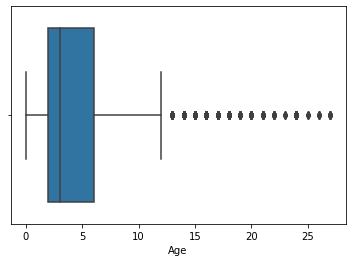

In [9]:
sns.boxplot(df_train['Age']) # see if improved

In [10]:
df_train['Age'].describe()

count    9524.000000
mean        5.425346
std         5.969276
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        27.000000
Name: Age, dtype: float64

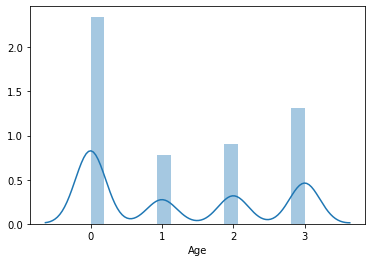

In [11]:
q_cuts = pd.qcut(df_train['Age'], 4, labels=False)

#pd.cut(df_train['Age'], bins=10, labels=False)
sns.distplot(q_cuts)

In [12]:
df_train['Age'] = q_cuts

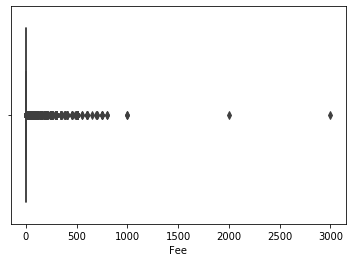

In [13]:
sns.boxplot(df_train['Fee'])

In [14]:
df_train['Fee'].describe()

count    9524.000000
mean       18.564049
std        75.627542
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3000.000000
Name: Fee, dtype: float64

In [23]:
import numpy as np
df_train['Fee'] = np.where(df_train['Fee'] == 0, 0,1)

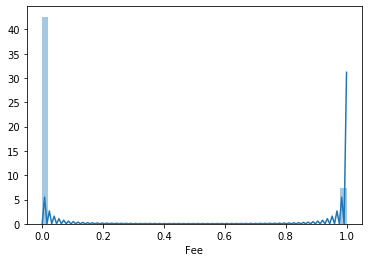

In [24]:
sns.distplot(df_train['Fee'])

In [25]:
# Separar la columna AdoptionSpeed en otro dataframe. (X , y = df.iloc[ : , : ], df.AdoptionSpeed)
X, y = df_train.drop(['AdoptionSpeed'], axis=1), df_train.AdoptionSpeed 

In [17]:
# Utilizar ambos dataset para ajustar una regresión lineal y comparar resultados. A mayor score, mejor el ajuste.
X.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Fee', 'breed_new', 'Gender_1',
       'Gender_2', 'Gender_3', 'Health_1', 'Health_2', 'Health_3'],
      dtype='object')

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [26]:
#Baseline: 0.038
modelo_lr = LinearRegression().fit(X, y)
modelo_lr.score(X,y)

0.10485971499374969